Loaded 1703 texts with embeddings.
Starting similarity search...
Found 170 pairs with similarity >= 0.95.

Most Similar Pairs (with >= 95% similarity):
Text 1 and Text 109 have similarity of 0.97
Text 5 and Text 376 have similarity of 0.98
Text 30 and Text 33 have similarity of 0.96
Text 40 and Text 41 have similarity of 0.97
Text 44 and Text 45 have similarity of 0.99
Text 69 and Text 70 have similarity of 0.98
Text 72 and Text 1483 have similarity of 0.95
Text 123 and Text 1183 have similarity of 0.98
Text 126 and Text 335 have similarity of 0.98
Text 126 and Text 336 have similarity of 1.00


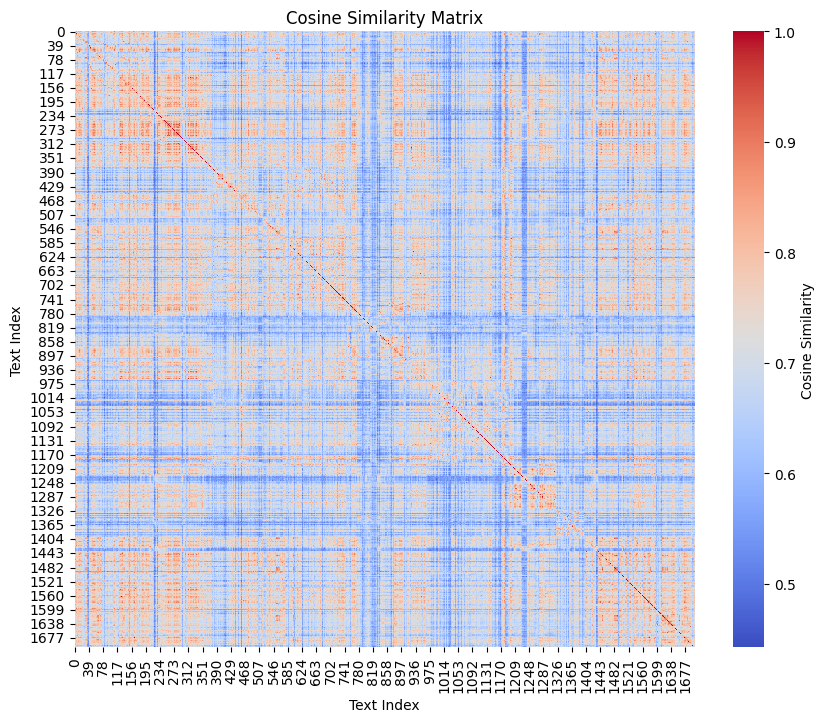

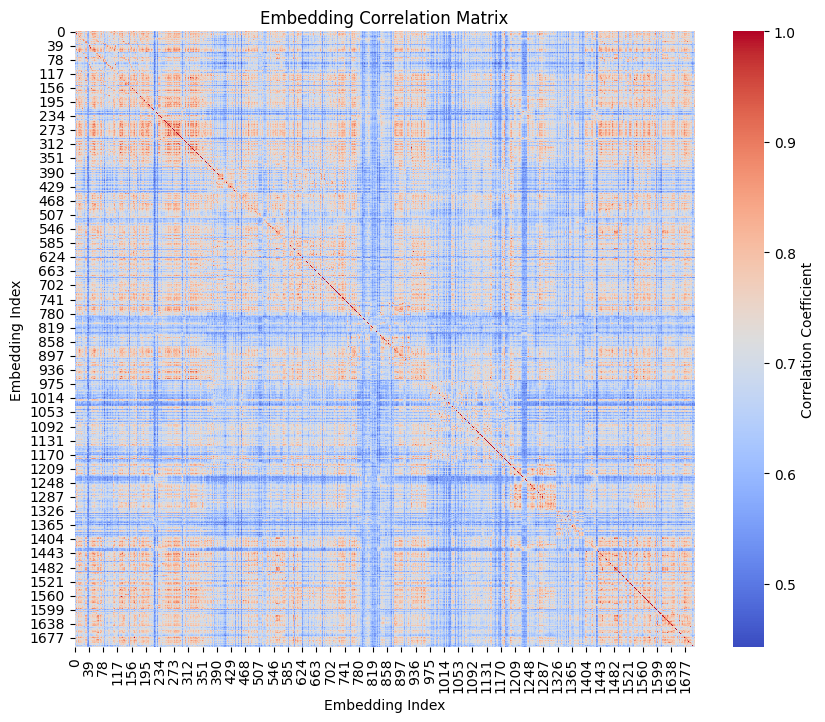

Calculating similarity distribution...


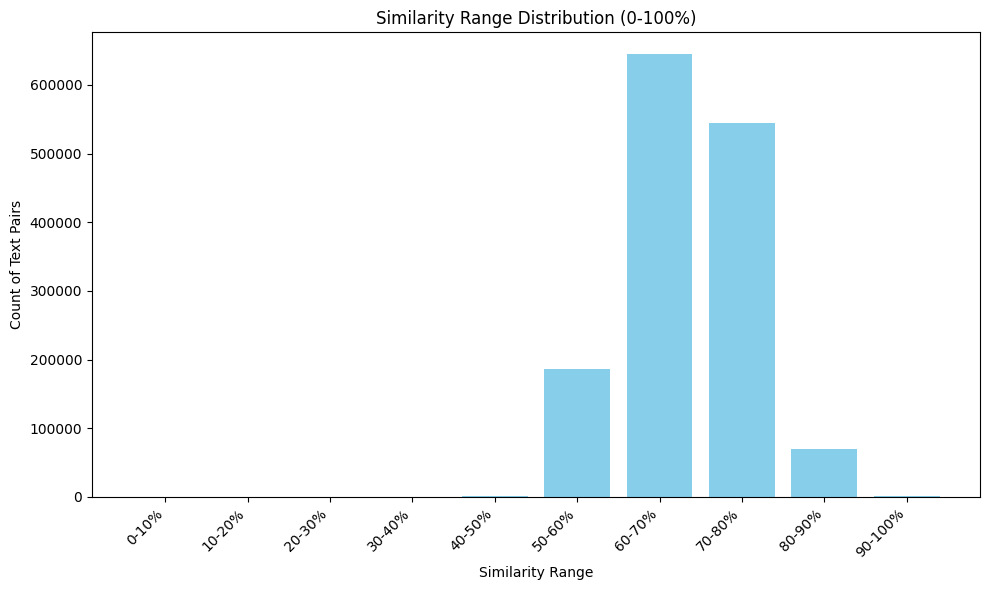

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the embeddings data
def load_embeddings(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    
    embeddings = []
    texts = []
    
    # Extract embeddings and texts
    for entry in data:
        embeddings.append(entry['embedding'])  # Assuming 'embedding' key contains the vector
        texts.append(entry['text'])            # Assuming 'text' key contains the actual text
    
    return texts, np.array(embeddings)

# Step 2: Find similar texts using cosine similarity
def find_similar_texts(embeddings, threshold=0.95):
    print("Starting similarity search...")
    
    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(embeddings)
    
    # Create a list to store similar text pairs above the threshold
    similar_pairs = []
    
    # Identify pairs with similarity above the threshold
    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):  # Compare only the upper half (no duplicates)
            if similarity_matrix[i, j] >= threshold:
                similar_pairs.append((i, j, similarity_matrix[i, j]))  # (text index 1, text index 2, similarity score)
    
    print(f"Found {len(similar_pairs)} pairs with similarity >= {threshold}.")
    return similar_pairs, similarity_matrix

# Step 3: Plot similarity matrix using heatmap
def plot_similarity_matrix(similarity_matrix):
    plt.figure(figsize=(10, 8))
    
    # Create a heatmap of the similarity matrix
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
    
    plt.title("Cosine Similarity Matrix")
    plt.xlabel("Text Index")
    plt.ylabel("Text Index")
    plt.show()

# Step 4: Plot the correlation matrix of the embeddings
def plot_correlation_matrix(embeddings):
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(embeddings)
    
    plt.figure(figsize=(10, 8))
    
    # Create a heatmap for the correlation matrix
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
    
    plt.title("Embedding Correlation Matrix")
    plt.xlabel("Embedding Index")
    plt.ylabel("Embedding Index")
    plt.show()

# Step 5: Calculate and plot the similarity range distribution
def plot_similarity_distribution(similarity_matrix):
    print("Calculating similarity distribution...")
    
    # Flatten the similarity matrix to get all pairwise similarity scores
    similarity_values = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]  # Get upper triangle values (excluding diagonal)
    
    # Create bins for similarity ranges (0-10, 10-20, ..., 90-100)
    bins = np.arange(0, 1.1, 0.1)
    bin_labels = [f"{int(b * 100)}-{int((b + 0.1) * 100)}%" for b in bins[:-1]]
    
    # Compute the histogram of similarity values
    similarity_hist, _ = np.histogram(similarity_values, bins=bins)
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(bin_labels, similarity_hist, width=0.8, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Similarity Range")
    plt.ylabel("Count of Text Pairs")
    plt.title("Similarity Range Distribution (0-100%)")
    plt.tight_layout()
    plt.show()

# Step 6: Main pipeline to load, analyze, and visualize embeddings
def main():
    file_path = "embedded_results_resistant.json"  # Path to the embedded result JSON file
    
    # Load the embeddings data
    texts, embeddings = load_embeddings(file_path)
    print(f"Loaded {len(texts)} texts with embeddings.")
    
    # Find similar texts with 95% similarity or higher
    similar_pairs, similarity_matrix = find_similar_texts(embeddings, threshold=0.95)
    
    # Show some of the most similar pairs
    if similar_pairs:
        print("\nMost Similar Pairs (with >= 95% similarity):")
        for i, j, score in similar_pairs[:10]:  # Print top 10 similar pairs
            print(f"Text {i+1} and Text {j+1} have similarity of {score:.2f}")
    
    # Visualize the similarity matrix
    plot_similarity_matrix(similarity_matrix)
    
    # Visualize the correlation matrix of embeddings
    plot_correlation_matrix(embeddings)
    
    # Plot the similarity distribution
    plot_similarity_distribution(similarity_matrix)

# Execute the pipeline
if __name__ == "__main__":
    main()
